In [1]:
import gsw
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from time import sleep
from matplotlib import rc
%matplotlib inline
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

rc('font', **font)
from jupyterthemes import jtplot
jtplot.style()
%matplotlib inline

In [2]:
outfile = '/home/ashao/git/ashao_forks/MOM6-examples/ocean_only/tracer_mixing/z/prog.nc'
initfile = '/home/ashao/git/ashao_forks/MOM6-examples/ocean_only/tracer_mixing/z/Initial_state.nc'
out = nc.Dataset(outfile)
init = nc.Dataset(initfile)
xh = out.variables['xh'][:]
zl = out.variables['zl'][:]

In [3]:
jtplot.reset()
rc('font', **font)
plt.figure(figsize=(6,12))
temp_0 = init.variables['Temp'][0,:,0,:]
salt_0 = init.variables['Salt'][0,:,0,:];
S_levels = np.linspace(salt_0.min(),salt_0.max(),10)
T_levels = np.linspace(temp_0.min(),temp_0.max(),10)
plt.subplot(212)
plt.contour(xh,zl,salt_0,S_levels,colors='black')
plt.contour(xh,zl,temp_0,T_levels,colors='red')
proxy = ( (plt.Rectangle((0,0),1,1,fc = 'black')), (plt.Rectangle((0,0),1,1,fc = 'red')))
plt.legend(proxy, ["Salinity", "Temperature"],loc=4)
plt.xlabel('Zonal distance (km)')
plt.ylabel('Depth (m)')
plt.gca().invert_yaxis()
plt.subplot(211)
plt.scatter(salt_0.flatten(),temp_0.flatten(),2)
plt.ylabel('Temperature')
plt.xlabel('Salinity')
plt.grid()

In [4]:
t = 0
rho_0 = out.variables['rhoinsitu'][t,:,0,:]
temp_0 = out.variables['temp'][t,:,0,:]
salt_0 = out.variables['salt'][t,:,0,:];
gsw.sigma0?

rho_0 = salt_0
dye_0 = out.variables['dye001'][t,:,0,:]
t = -1
rho_f = out.variables['rhoinsitu'][t,:,0,:]
temp_f = out.variables['temp'][t,:,0,:]
salt_f = out.variables['salt'][t,:,0,:];
rho_f = salt_f
dye_f = out.variables['dye001'][t,:,0,:]

In [5]:
jtplot.reset()
rc('font', **font)
plt.figure(figsize=(6,12))
temp_0 = init.variables['Temp'][0,:,0,:]
salt_0 = init.variables['Salt'][0,:,0,:];
S_levels = np.linspace(salt_0.min(),salt_0.max(),10)
T_levels = np.linspace(temp_0.min(),temp_0.max(),10)
plt.subplot(212)
plt.contour(xh,zl,salt_f,S_levels,colors='black')
plt.contour(xh,zl,temp_f,T_levels,colors='red')
proxy = ( (plt.Rectangle((0,0),1,1,fc = 'black')), (plt.Rectangle((0,0),1,1,fc = 'red')))
plt.legend(proxy, ["Salinity", "Temperature"],loc=4)
plt.xlabel('Zonal distance (km)')
plt.ylabel('Depth (m)')
plt.gca().invert_yaxis()
plt.subplot(211)
plt.scatter(salt_0.flatten(),temp_0.flatten(),4,color='blue')
plt.scatter(salt_f.flatten(),temp_f.flatten(),10,color='black')
plt.ylabel('Temperature')
plt.xlabel('Salinity')
proxy = ( (plt.Rectangle((0,0),1,1,fc = 'black')), (plt.Rectangle((0,0),1,1,fc = 'blue')))
plt.legend(proxy, ["Final", "Initial"],loc=4)
plt.grid()

/home/ashao/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


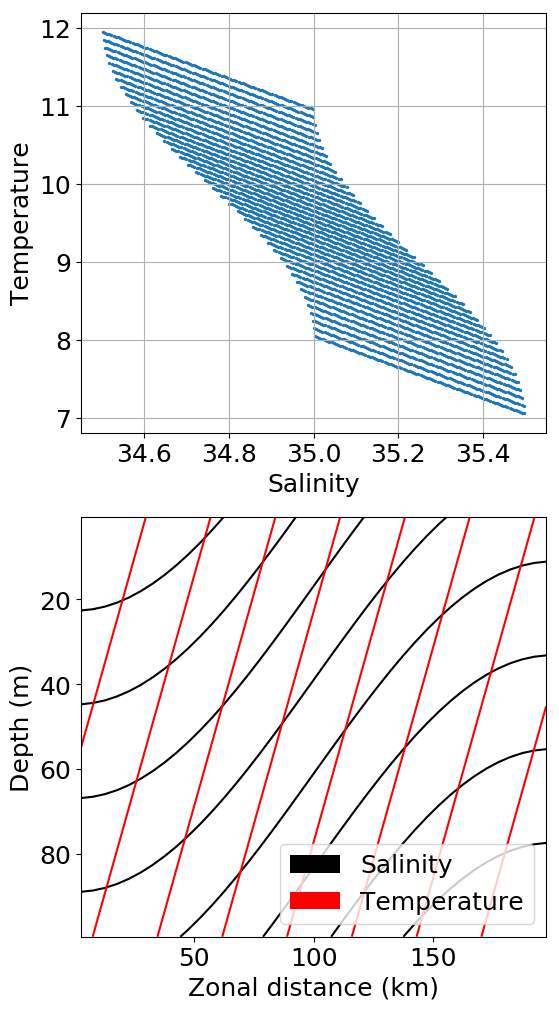

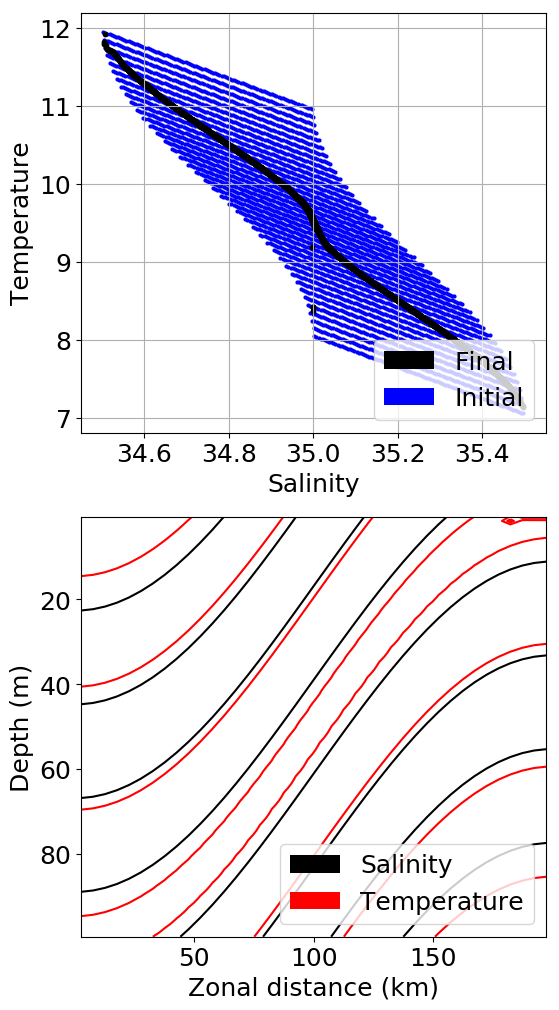

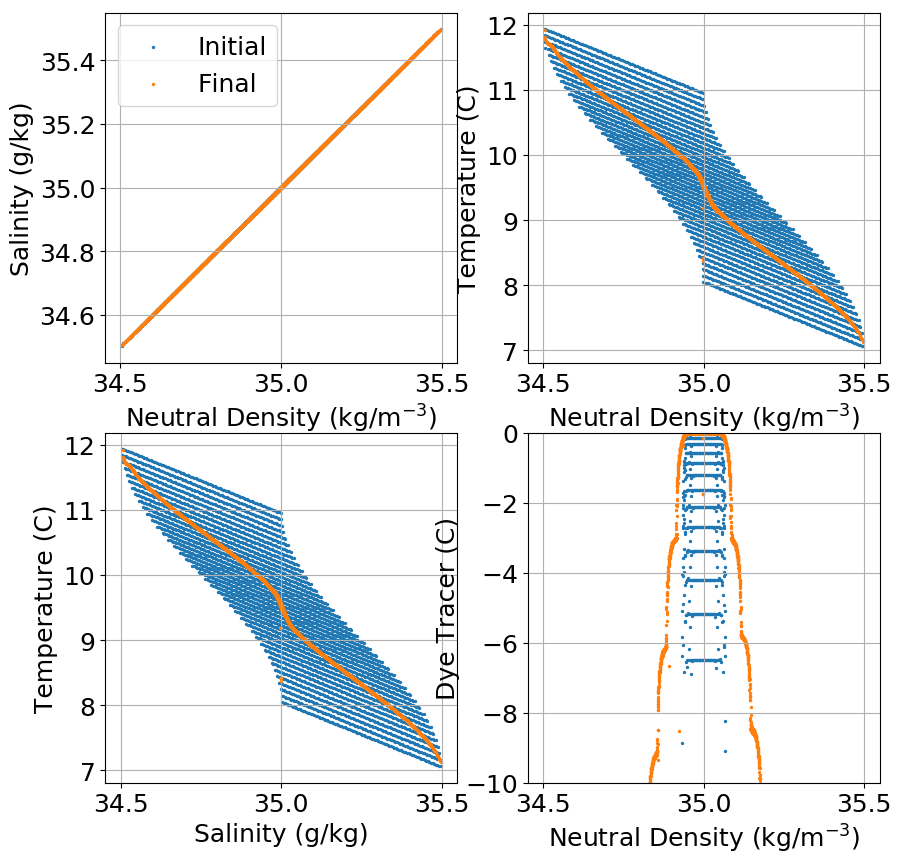

In [6]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(rho_0,salt_0,s=2.,label='Initial')
plt.scatter(rho_f,salt_f,s=2.,label='Final')
plt.legend()
plt.xlabel(r'Neutral Density (kg/m$^{-3}$)')
plt.ylabel(r'Salinity (g/kg)')
plt.grid()
plt.subplot(2,2,2)
plt.scatter(rho_0,temp_0,s=2.)
plt.scatter(rho_f,temp_f,s=2.)
plt.xlabel(r'Neutral Density (kg/m$^{-3}$)')
plt.ylabel(r'Temperature (C)')
plt.grid()
plt.subplot(2,2,3)
plt.scatter(salt_0,temp_0,s=2.)
plt.scatter(salt_f,temp_f,s=2.)
plt.grid()
plt.xlabel(r'Salinity (g/kg)')
plt.ylabel(r'Temperature (C)')
plt.subplot(2,2,4)
plt.scatter(rho_0,np.log10(np.abs(dye_0)+1e-30),s=2.)
plt.scatter(rho_f,np.log10(np.abs(dye_f)+1e-30),s=2.)
plt.xlabel(r'Neutral Density (kg/m$^{-3}$)')
plt.ylabel(r'Dye Tracer (C)')
plt.ylim(-10,0)
plt.grid()
plt.show()

In [7]:
salt_0.max()

35.497307259060186

/home/ashao/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/home/ashao/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """
/home/ashao/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()
/home/ashao/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log10
  # This is added back by InteractiveShellApp.init_path()
/home/ashao/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


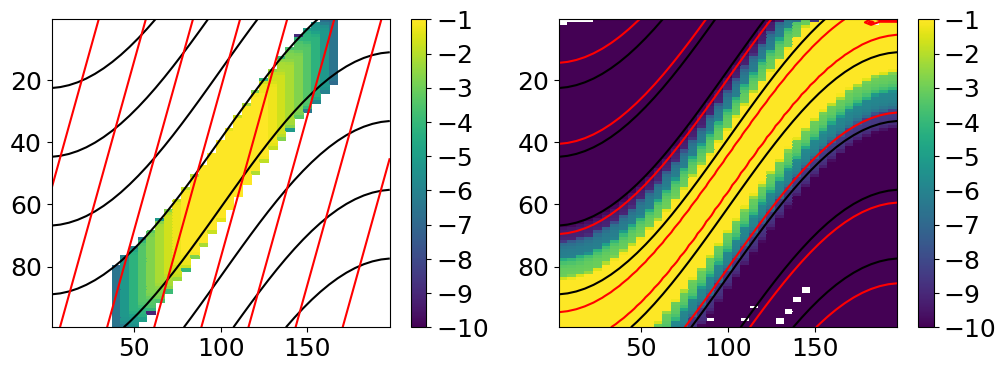

In [8]:
S_levels = np.linspace(salt_0.min(),salt_0.max(),10)
T_levels = np.linspace(temp_0.min(),temp_0.max(),10)
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.pcolormesh(xh,zl,np.log10(dye_0),vmin=-10.,vmax=-1)
plt.colorbar()
plt.contour(xh,zl,salt_0,S_levels,colors='black')
plt.contour(xh,zl,temp_0,T_levels,colors='red')
plt.gca().invert_yaxis()
plt.subplot(122)
plt.pcolormesh(xh,zl,np.log10(dye_f),vmin=-10,vmax=-1)
plt.colorbar()
plt.contour(xh,zl,salt_f,S_levels,colors='black')
plt.contour(xh,zl,temp_f,T_levels,colors='red')
plt.gca().invert_yaxis()
plt.show()


In [9]:
# jtplot.reset()
# time = out.variables['Time'][:]
# ntime = out.variables['Time'].size

# S_levels = np.linspace(salt_0.min(),salt_0.max(),10)
# T_levels = np.linspace(temp_0.min(),temp_0.max(),10)
# outpath = '/home/ashao/figs/ndiff_algorithm/'
# for t in range(0,ntime):
#     temp = out.variables['temp'][t,:,0,:]
#     salt = out.variables['salt'][t,:,0,:]
#     plt.contour(xh,zl,salt,S_levels,colors='black')
#     plt.contour(xh,zl,temp,T_levels,colors='red')
#     plt.xlabel('Zonal Distance (km)')
#     plt.ylabel('Depth (m)')
#     plt.gca().invert_yaxis()
#     plt.title('Time: %f days' % time[t])
#     outfile = outpath + "idealized_linear_z_%02d.png" % np.floor(time[t])
#     plt.savefig(outfile, bbox_inches='tight')
#     plt.clf()
                                 

In [10]:
print((rho_f-rho_0).sum())

0.0


In [11]:
"blah %d" % 5

'blah 5'

In [12]:
plt.savefig

<function matplotlib.pyplot.savefig>

In [13]:
rho_0.min()

34.505471637232837